In [28]:
## TensorFlow untuk membangun dan melatih model deep learning.
## Keras (models, layers) untuk membuat model dan menambahkan lapisan neural network.
## Matplotlib (plt) untuk visualisasi data atau gambar.

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [29]:
BATCH_SIZE = 32 ## Menentukan ukuran batch, yaitu jumlah sampel yang diproses sebelum model diperbarui. Setiap batch berisi 32 gambar.
IMAGE_SIZE = 256 ## Menetapkan ukuran gambar yang digunakan untuk pelatihan, yaitu 256x256 piksel.
CHANNELS=3 ## Menunjukkan jumlah kanal warna (3 untuk gambar berwarna RGB: merah, hijau, biru).
EPOCHS=50 ## Menyatakan jumlah epoch atau berapa kali seluruh dataset dilatih selama 50 putaran.

In [30]:
## tf.keras.preprocessing.image_dataset_from_directory: Fungsi untuk membuat dataset gambar dari direktori yang berisi subdirektori untuk setiap kelas.
## "PlantVillage": Lokasi folder dataset gambar yang akan dimuat.
## seed=123: Seed untuk pengacakan, memastikan hasil yang konsisten saat shuffle.
## shuffle=True: Gambar diacak agar urutannya acak dalam batch.
## image_size=(IMAGE_SIZE, IMAGE_SIZE): Gambar diubah ukurannya menjadi 256x256 piksel (nilai dari IMAGE_SIZE).
## batch_size=BATCH_SIZE: Setiap batch memuat 32 gambar (nilai dari BATCH_SIZE).

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [31]:
## dataset.class_names: Mengambil daftar nama kelas dari dataset, yaitu subdirektori yang berisi gambar, yang mewakili kategori/label dalam dataset.
## class_names: Variabel ini menyimpan nama-nama kelas tersebut.
## class_names: Menampilkan daftar nama kelas setelah disimpan di variabel.

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [32]:
## for image_batch, labels_batch in dataset.take(1):: Ini mengambil satu batch gambar dan label dari dataset. take(1) mengambil satu batch (ukuran batch sudah ditentukan sebelumnya, yaitu 32 gambar).
## print(image_batch.shape): Menampilkan bentuk/tensor dari batch gambar, yang biasanya berformat (batch_size, image_height, image_width, channels). Contohnya: (32, 256, 256, 3) berarti 32 gambar dengan ukuran 256x256 piksel dan 3 kanal warna (RGB).
## print(labels_batch.numpy()): Menampilkan nilai numerik label dari batch tersebut dalam bentuk array NumPy. Contoh output: [0, 1, 0, 1, ...], di mana setiap angka mewakili kelas gambar.

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


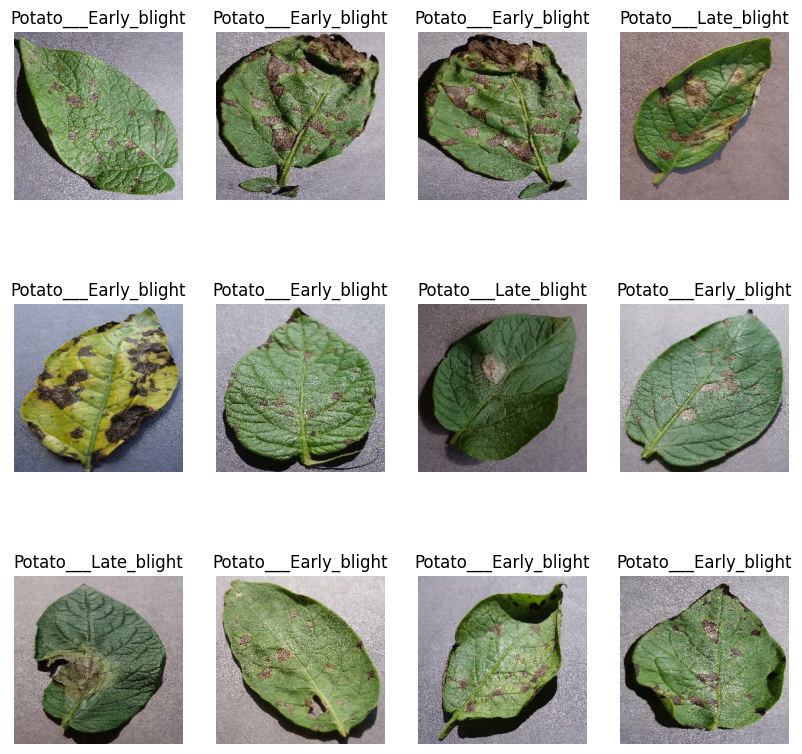

In [33]:
## 

plt.figure(figsize=(10, 10)) ## Membuat sebuah figure berukuran 10x10 inci untuk menampung gambar.
for image_batch, labels_batch in dataset.take(1): ## Mengambil satu batch gambar dan label dari dataset.
    for i in range(12): ## Loop yang mengiterasi sebanyak 12 kali untuk menampilkan 12 gambar dari batch.
        ax = plt.subplot(3, 4, i + 1) ## Membuat grid 3x4 (12 slot) untuk menampilkan gambar dalam subplot yang terpisah.
        plt.imshow(image_batch[i].numpy().astype("uint8")) ## Menampilkan gambar ke-i dari batch dalam format RGB (diubah menjadi uint8 untuk nilai pixel 0-255).
        plt.title(class_names[labels_batch[i]]) ## Menambahkan judul di atas setiap gambar berdasarkan nama kelas yang sesuai dengan label gambar.
        plt.axis("off") ## Menyembunyikan sumbu untuk setiap gambar agar tampilan lebih bersih.

In [34]:
len(dataset) ## digunakan untuk menghitung jumlah batch dalam dataset.

68

In [35]:
train_size = 0.8 ## Menetapkan bahwa 80% dari dataset akan digunakan untuk pelatihan.
len(dataset)*train_size ## Menghitung jumlah batch yang akan dialokasikan untuk pelatihan dengan mengalikan total batch dalam dataset dengan 0.8.

54.400000000000006

In [36]:
train_ds = dataset.take(54) ## Mengambil 54 batch pertama dari dataset asli dan menyimpannya dalam variabel train_ds. Ini berarti dataset pelatihan terdiri dari 54 batch.
len(train_ds) ## Menghitung jumlah batch dalam train_ds.

54

In [37]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [38]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [39]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [40]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [41]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [42]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [43]:
len(train_ds)

54

In [44]:
len(val_ds)

6

In [45]:
len(test_ds)

8

In [46]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [47]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])


In [48]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [49]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [51]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [53]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4855 - loss: 0.9345 - val_accuracy: 0.6458 - val_loss: 0.8884
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6123 - loss: 0.8152 - val_accuracy: 0.6875 - val_loss: 0.7209
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8003 - loss: 0.4752 - val_accuracy: 0.8438 - val_loss: 0.3690
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8929 - loss: 0.2522 - val_accuracy: 0.8490 - val_loss: 0.2987
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8983 - loss: 0.2561 - val_accuracy: 0.9219 - val_loss: 0.2439
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9317 - loss: 0.1864 - val_accuracy: 0.9167 - val_loss: 0.2248
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9257 - loss: 0.2055 - val_accuracy: 0.9167 - val_loss: 0.2076
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9479 - loss: 0.1366 - val_accuracy: 0.9635 - val_los

In [54]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 564ms/step - accuracy: 0.9708 - loss: 0.1059


In [55]:
scores

[0.09381431341171265, 0.97265625]

In [56]:
history

In [57]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [58]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [59]:
type(history.history['loss'])

list

In [60]:
len(history.history['loss'])

50

In [61]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9104115962982178,
 0.7304438948631287,
 0.4190976917743683,
 0.24586065113544464,
 0.26748526096343994]

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

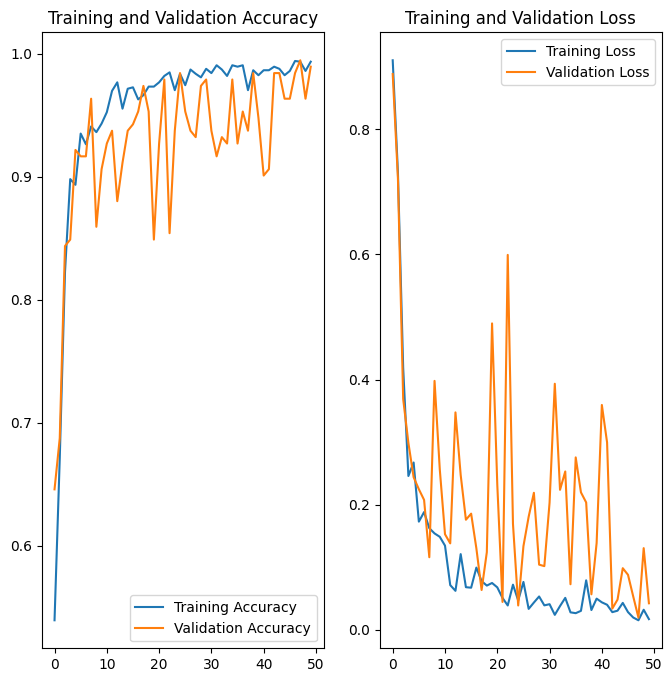

In [63]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Late_blight


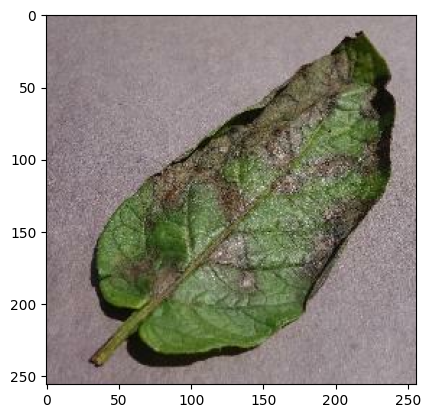

In [64]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [65]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


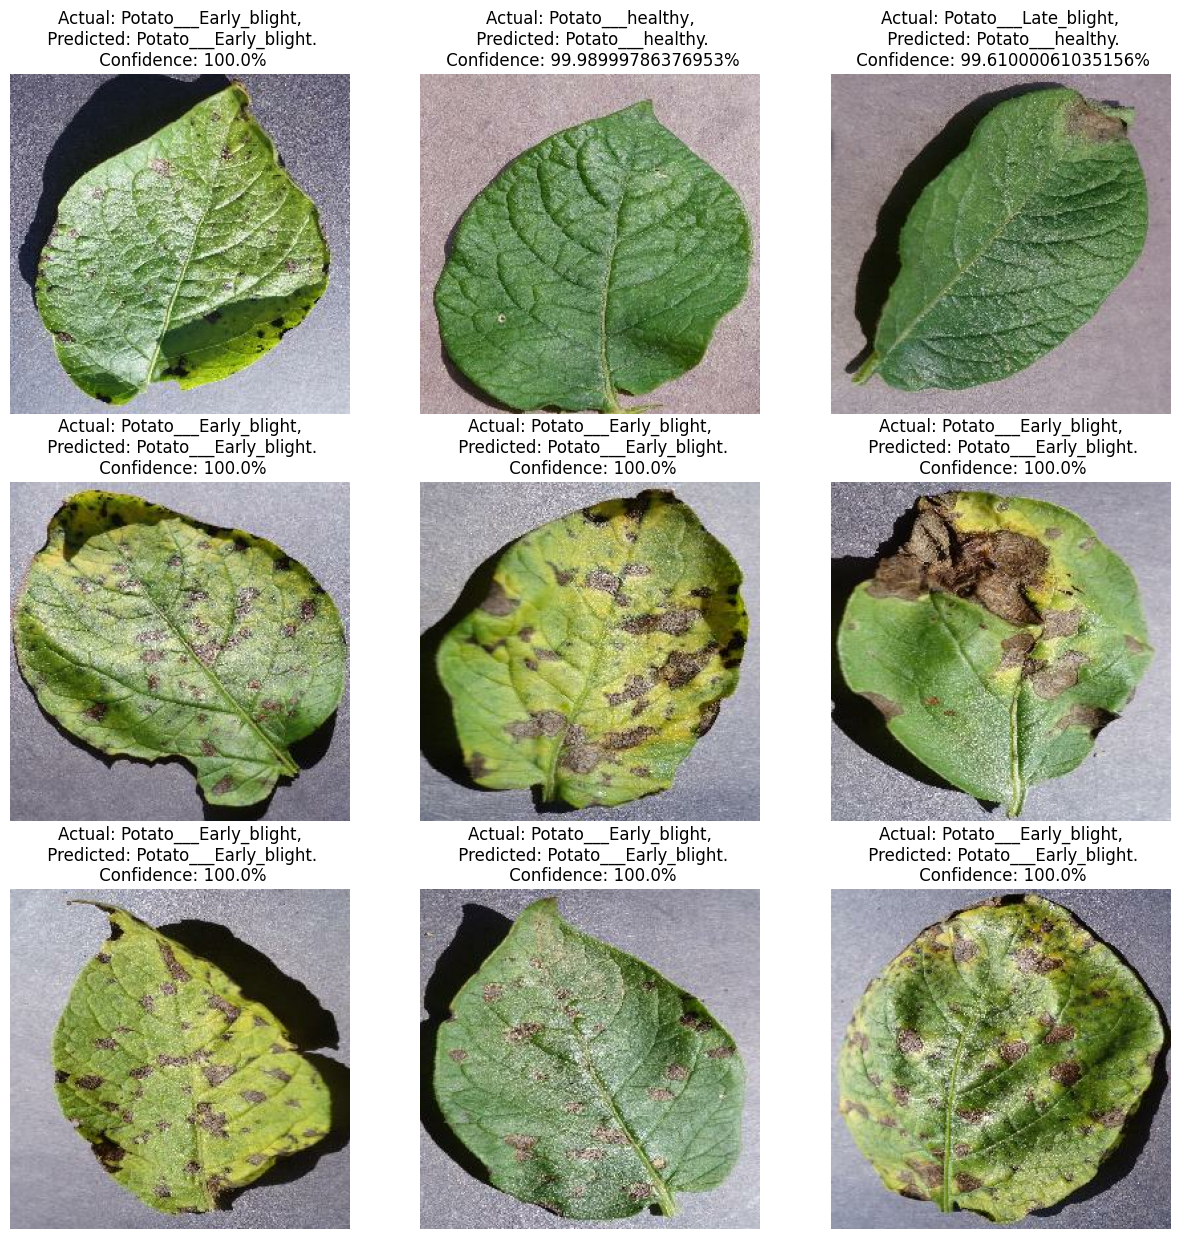

In [66]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")